## **IRIS DATASET CLASSIFICATION**

In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
#Linear Regression
from sklearn.linear_model import LinearRegression
#SVM
from sklearn.svm import SVC
#Normalization
from sklearn.preprocessing import StandardScaler
#Training and testing data split
from sklearn.model_selection import train_test_split 
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#Accuracy Measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Random Forest
from sklearn.ensemble import RandomForestClassifier

Reading the dataset

In [2]:
data = pd.read_csv("iris_dataset.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
desc = data.describe()
desc

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h3>Feature Scaling</h3>

We will use the min - max method to scale the values down

In [8]:
range = data["sepal_length"].max() - data["sepal_length"].min()
range

3.6000000000000005

In [9]:
data["sepal_length"] = (data["sepal_length"] - data["sepal_length"].min())/range
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,3.5,1.4,0.2,setosa
1,0.166667,3.0,1.4,0.2,setosa
2,0.111111,3.2,1.3,0.2,setosa
3,0.083333,3.1,1.5,0.2,setosa
4,0.194444,3.6,1.4,0.2,setosa


In [10]:
data["sepal_length"] = data["sepal_length"] / data["sepal_length"].max()
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,3.5,1.4,0.2,setosa
1,0.166667,3.0,1.4,0.2,setosa
2,0.111111,3.2,1.3,0.2,setosa
3,0.083333,3.1,1.5,0.2,setosa
4,0.194444,3.6,1.4,0.2,setosa


In [11]:
data['species'] = data['species'].replace("setosa","0")
data['species'] = data['species'].replace("versicolor","1")
data['species'] = data['species'].replace("virginica","2")
data['species']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: object

### **Exploratory data Analysis**

**Univariate Analysis**

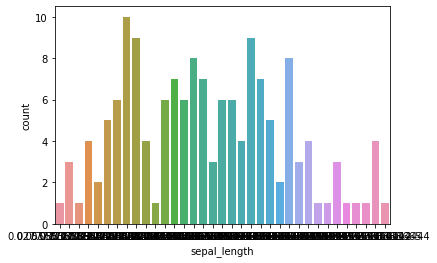

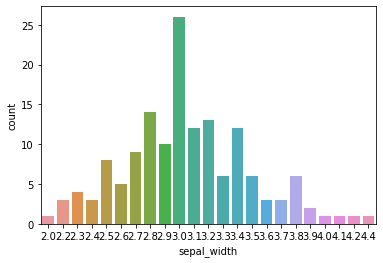

In [12]:

fig1 =sns.countplot(data.sepal_length)

plt.show(fig1)
fig2 =sns.countplot(data.sepal_width)
plt.show(fig2)

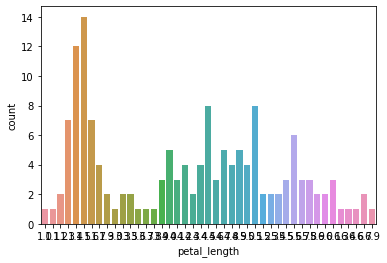

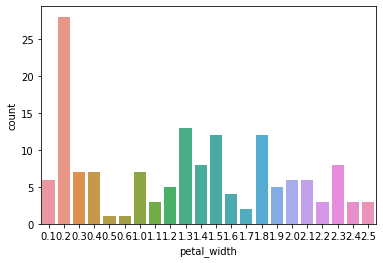

In [13]:
fig1 =sns.countplot(data.petal_length)

plt.show(fig1)
fig2 =sns.countplot(data.petal_width)
plt.show(fig2)

**Bivariate Analysis**

Sepal Length vs Petal Length

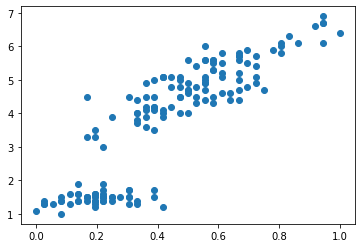

In [14]:
plt.scatter(data.sepal_length,data.petal_length)

Sepal Length vs Sepal Width

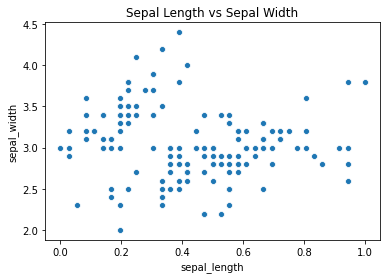

In [15]:
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = data)
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [16]:
data['sepal_length'].corr(data['sepal_width'])

-0.10936924995064934

PetalLength vs PetalWidth

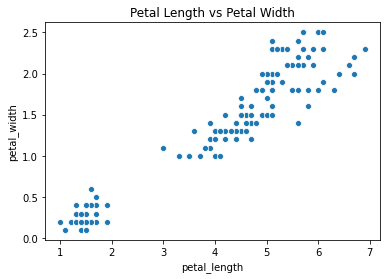

In [17]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = data )
plt.title('Petal Length vs Petal Width')
plt.show()


In [18]:
data['petal_length'].corr(data['petal_width'])

0.9627570970509663

Analysis: This is a very insightful graph. It tells us that we can use PetalLength to predict PetalWidth and it's category because of the proper clustrering of data points. The correlation is also very high. We can use these features for regression analysis later. **

**Multivariate Analysis**

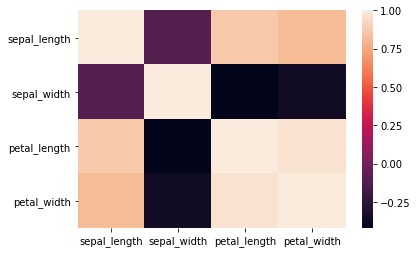

In [19]:
# Checking correlation again
data_corr = data.corr()
sns.heatmap(data_corr)

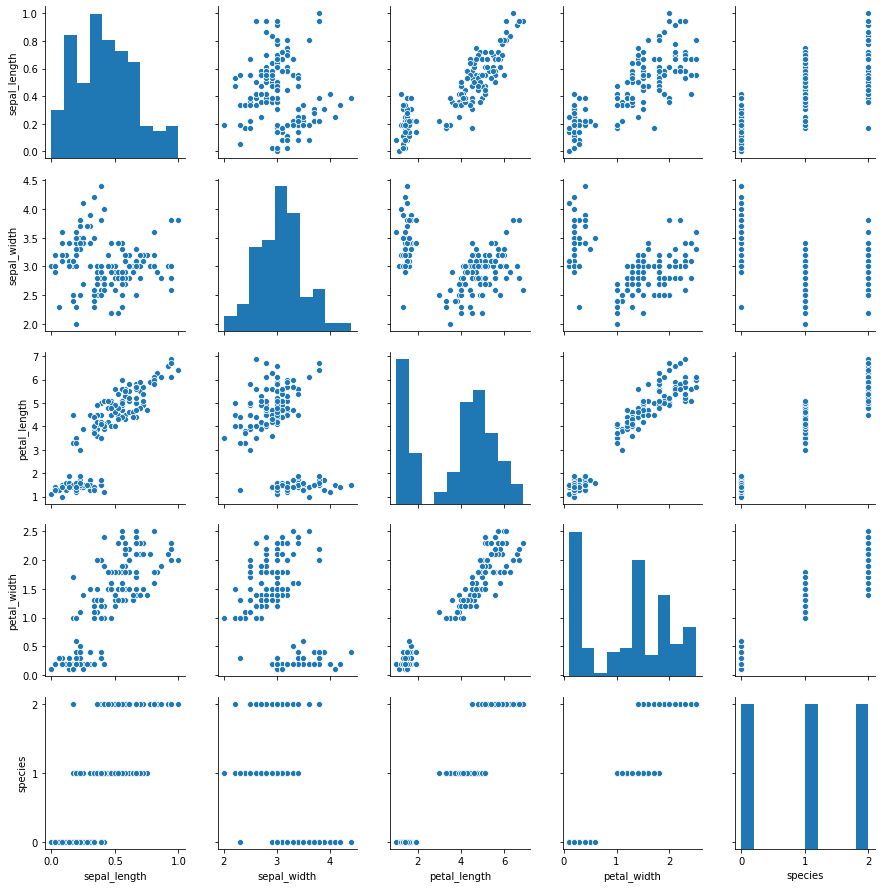

In [20]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000294377DDC88>,
      dtype=object)

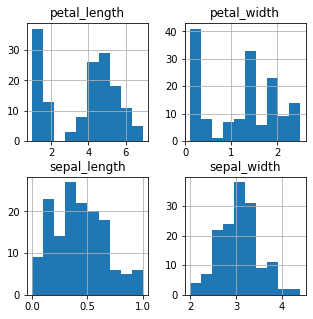

In [21]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
data.hist(ax = ax)

<h3>Removing Outliers</h3>


,sepal_length,sepal_width,petal_length,petal_width,species


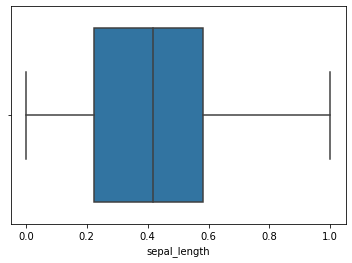

In [22]:


sns.boxplot(data.sepal_length)
outliers = data[(data['sepal_length'] > 1.0)] 
outliers

There are no outliers in Sepal Length column

    sepal_length  sepal_width  petal_length  petal_width species
15      0.388889          4.4           1.5          0.4       0
32      0.250000          4.1           1.5          0.1       0
33      0.333333          4.2           1.4          0.2       0
    sepal_length  sepal_width  petal_length  petal_width species
60      0.194444          2.0           3.5          1.0       1


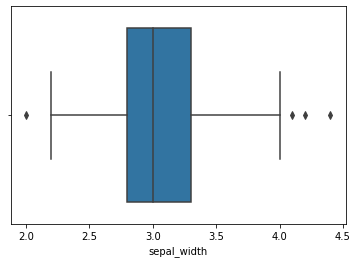

In [23]:
sns.boxplot(data.sepal_width)
outliers = data[(data['sepal_width'] > 4.0)] 
outliers1 = data[(data['sepal_width'] < 2.1)]
print(outliers)
print(outliers1)

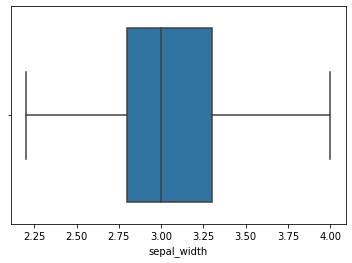

In [24]:
data = data.drop(data[data.sepal_width > 4.0].index)
data = data.drop(data[data.sepal_width < 2.1].index)
sns.boxplot(data.sepal_width)

,sepal_length,sepal_width,petal_length,petal_width,species
105,0.916667,3.0,6.6,2.1,2
117,0.944444,3.8,6.7,2.2,2
118,0.944444,2.6,6.9,2.3,2
122,0.944444,2.8,6.7,2.0,2
131,1.000000,3.8,6.4,2.0,2


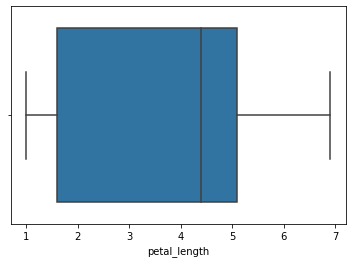

In [25]:

sns.boxplot(data.petal_length)
outliers = data[(data['petal_length'] > 6.3)] 
outliers

There are no outliers in Petal Length column

,sepal_length,sepal_width,petal_length,petal_width,species


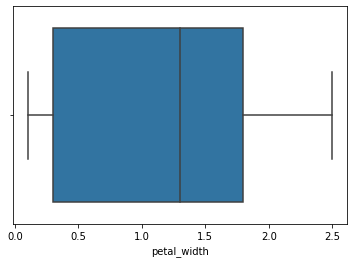

In [26]:

sns.boxplot(data.petal_width)
outliers = data[(data['petal_width'] > 2.5)] 
outliers

There are no outliers in Petal width column

<h3>Train Test Split</h3>

In [27]:

X = data.iloc[:, 1:5]
y = data.iloc[:, 4]

In [28]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
#test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 102 samples in the training set and 44 samples in the test set


<h3>Resampling imbalanced Dataset </h3>

Class 0: 50
Class 1: 49
Class 2: 47
Proportion: 1.02 : 1
Proportion: 1.06 : 1


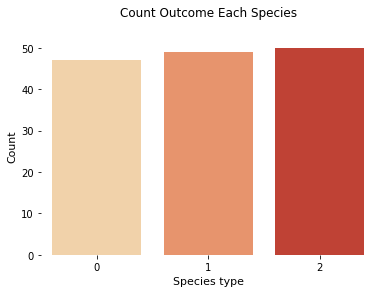

In [29]:
# Checking balance of outcome variable
target_count = data.species.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
print('Proportion:',round(target_count[0]/target_count[2],2),": 1")

sns.countplot(data.species, palette="OrRd")
plt.box(False)
plt.xlabel('Species type',fontsize=11)
plt.ylabel('Count',fontsize=11)
plt.title('Count Outcome Each Species\n')
plt.show()

We can see that the proportion is 1.04:1 and 1.11:1 which is not well balanced. One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.
<br>

<h4>UNDERSAMPLING METHOD</h4>
Undersampling aims to decrease the number of instances from the overrepresented class in the data set. In our case, these techniques will decrease the number of fraudulent transactions in our data to approximately 50:50. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.

The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class.

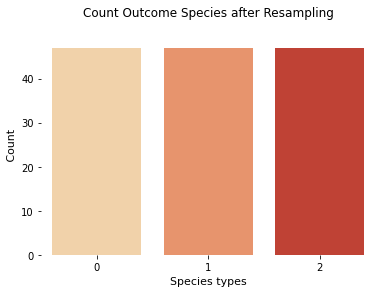

In [30]:
# Shuffle df
shuffled_data = data.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
spe_data = shuffled_data.loc[shuffled_data['species'] == "1"].sample(n=47,random_state=42)



non_spe_data = shuffled_data.loc[shuffled_data['species'] == "0"]

spe_2_data = shuffled_data.loc[shuffled_data['species'] == "2"].sample(n=47,random_state=42)

# Concatenate both dataframes again
normalized_data = pd.concat([non_spe_data,spe_data, spe_2_data])

# check new class counts
normalized_data.species.value_counts()

# plot new count
sns.countplot(normalized_data.species, palette="OrRd")
plt.box(False)
plt.xlabel('Species types',fontsize=11)
plt.ylabel(' Count',fontsize=11)
plt.title('Count Outcome Species after Resampling\n')
plt.show()

<h3>Train Test Split on balanced dataset</h3>

In [31]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split
#X1 = normalized_data.iloc[:, 1:5]
#y1 = normalized_data.iloc[:, 4]
y1 = normalized_data['species']
X1 = normalized_data.drop(['species'], axis = 1)


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0) 
#test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
print('There are {} samples in the training set and {} samples in the test set'.format(X1_train.shape[0], X1_test.shape[0]))

There are 98 samples in the training set and 43 samples in the test set


<h3>Modelling and Evaluation</h3>

<h4>1.Logistic regression</h4>

In [32]:
# logistic regression again with the balanced dataset

lr= LogisticRegression()

normalized_data_reg = LogisticRegression().fit(X1_train, y1_train)

normalized_data_reg_pred = normalized_data_reg.predict(X1_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y1_test, normalized_data_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y1_test, normalized_data_reg_pred,average='weighted')
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y1_test, normalized_data_reg_pred,average='weighted')
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y1_test, normalized_data_reg_pred,average='weighted')
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 100.0%
The f1 score for LogReg is: 100.0%
The precision score for LogReg is: 100.0%
The recall score for LogReg is: 100.0%


Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

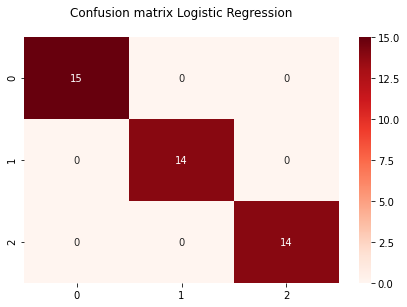

In [33]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y1_test, normalized_data_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

<h4>2.Support Vector Machine</h4>

In [34]:
# Support Vector Machine

#initialize model
svm = SVC()

#fit model
svm.fit(X1_train, y1_train)

normalized_data_svm_pred = svm.predict(X1_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y1_test, normalized_data_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y1_test, normalized_data_svm_pred,average='weighted')
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y1_test, normalized_data_svm_pred,average='weighted')
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y1_test, normalized_data_svm_pred,average='weighted')
print(f"The recall score for SVM is: {round(recall,3)*100}%")

The accuracy score for SVM is: 100.0%
The f1 score for SVM is: 100.0%
The precision score for SVM is: 100.0%
The recall score for SVM is: 100.0%


Text(0.5, 1.1, 'Confusion matrix SVM\n')

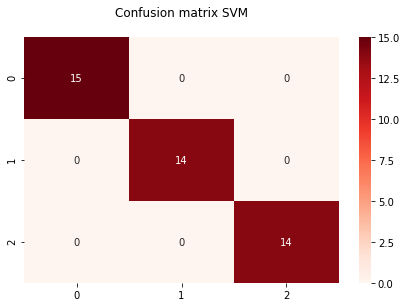

In [35]:
# plotting confusion matrix SVM

cnf_matrix_svm = confusion_matrix(y1_test, normalized_data_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

<h4>3.Decision Tree</h4>

In [36]:
#DecisionTree
#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X1_train, y1_train)

normalized_data_dtc_pred = dtc_up.predict(X1_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y1_test, normalized_data_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y1_test, normalized_data_dtc_pred,average='weighted')
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y1_test, normalized_data_dtc_pred,average='weighted')
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y1_test, normalized_data_dtc_pred,average='weighted')
print(f"The recall score for DTC is: {round(recall,3)*100}%")

The accuracy score for DTC is: 97.7%
The f1 score for DTC is: 97.7%
The precision score for DTC is: 97.8%
The recall score for DTC is: 97.7%


Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

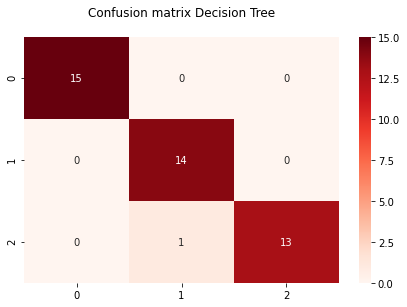

In [37]:
# plotting confusion matrix Decision Tree

cnf_matrix_dtc = confusion_matrix(y1_test, normalized_data_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

<h4>4.KNN</h4>

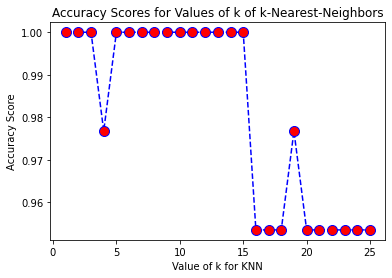

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = list(np.arange(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1_train, y1_train)
    y1_pred = knn.predict(X1_test)
    scores.append(metrics.accuracy_score(y1_test, y1_pred))
    
plt.plot(k_range, scores,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [39]:
# KNN Model

#initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X1_train, y1_train)

# prediction = knn.predict(x_test)
normalized_data_knn_pred = knn.predict(X1_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y1_test, normalized_data_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y1_test, normalized_data_knn_pred,average='weighted')
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y1_test, normalized_data_knn_pred,average='weighted')
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y1_test, normalized_data_knn_pred,average='weighted')
print(f"The recall score for KNN is: {round(recall,3)*100}%")

The accuracy score for KNN is: 100.0%
The f1 score for KNN is: 100.0%
The precision score for KNN is: 100.0%
The recall score for KNN is: 100.0%


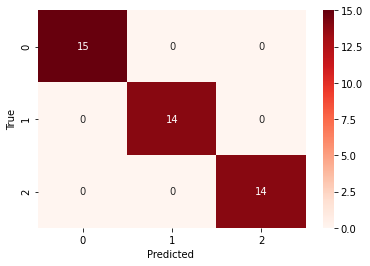

In [40]:
# plotting confusion matrix KNN

cnf_matrix_knn = confusion_matrix(y1_test, normalized_data_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

<h4>5.Naive Bayesian Classifier</h4>

In [41]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X1_train,y1_train)
pred_rand= model.predict(X1_test)
print("Accuracy of Naive Bayesian is:",metrics.accuracy_score(y1_test, pred_rand)*100,"%")
# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1rf = f1_score(y1_test,pred_rand,average='weighted')
print(f"The f1 score for Naive Bayesian is: {round(f1rf,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precisionrf = precision_score(y1_test,pred_rand,average='weighted')
print(f"The precision score for Naive Bayesian is: {round(precisionrf,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recallrf = recall_score(y1_test, pred_rand,average='weighted')
print(f"The recall score for Naive Bayesian is: {round(recallrf,3)*100}%")

Accuracy of Naive Bayesian is: 100.0 %
The f1 score for Naive Bayesian is: 100.0%
The precision score for Naive Bayesian is: 100.0%
The recall score for Naive Bayesian is: 100.0%


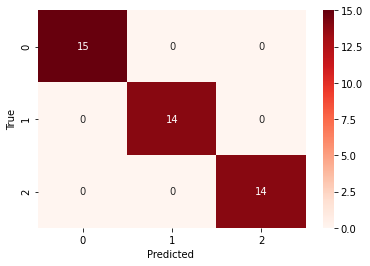

In [42]:
# plotting confusion matrix Naive Bayesian

cnf_matrix_bayesian = confusion_matrix(y1_test, pred_rand)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_bayesian), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

<h4>6.Random Forest Classifier</h4>

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=11)

#Train the model using the training sets y_pred=clf.predict(X1_test)
clf.fit(X1_train,y1_train)

pred_rand=clf.predict(X1_test)
print("Accuracy of Random Forest is:",metrics.accuracy_score(y1_test, pred_rand)*100,"%")
# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1rf = f1_score(y1_test, pred_rand,average='weighted')
print(f"The f1 score for Random Forest is: {round(f1rf,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precisionrf = precision_score(y1_test,pred_rand,average='weighted')
print(f"The precision score for Random Forest is: {round(precisionrf,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recallrf = recall_score(y1_test, pred_rand,average='weighted')
print(f"The recall score for Random Forest is: {round(recallrf,3)*100}%")

Accuracy of Random Forest is: 100.0 %
The f1 score for Random Forest is: 100.0%
The precision score for Random Forest is: 100.0%
The recall score for Random Forest is: 100.0%


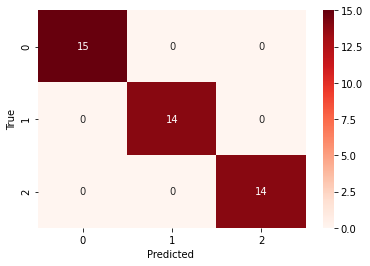

In [44]:
# plotting confusion matrix Random Forest

cnf_matrix_rf = confusion_matrix(y1_test, pred_rand)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

<h3>Cross Validation</h3>

<b>All Models except Decision Tree have given 100% accuracy</b>

<b>So we need to use Cross validation to find the best among the models that give 100% accuracy</b>

In [45]:
# Perform cross validation
'''Cross Validation is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set'''
print("Logistic Regression")
cv_results = cross_val_score(lr, X1, y1, cv=4) 
print ("Cross-validated scores:", cv_results)
print("The Accuracy of Logistic regression with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))
print("----------------------------------------------------------------")

print("SVM")
cv_results = cross_val_score(svm, X1, y1, cv=4) 
print ("Cross-validated scores:", cv_results)
print("The Accuracy of SVM with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))
print("----------------------------------------------------------------")

print("KNN")
cv_results = cross_val_score(knn, X1, y1, cv=4) 
print ("Cross-validated scores:", cv_results)
print("The Accuracy of SVM with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))
print("----------------------------------------------------------------")

print("Naive Bayesian Classifier")
cv_results = cross_val_score(model, X1, y1, cv=4) 
print ("Cross-validated scores:", cv_results)
print("The Accuracy of SVM with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))
print("----------------------------------------------------------------")



Logistic Regression
Cross-validated scores: [0.97222222 0.97222222 0.94444444 0.87878788]
The Accuracy of Logistic regression with Cross Validation is: 94.19%
----------------------------------------------------------------
SVM
Cross-validated scores: [1.         0.97222222 0.94444444 0.96969697]
The Accuracy of SVM with Cross Validation is: 97.16%
----------------------------------------------------------------
KNN
Cross-validated scores: [0.97222222 0.97222222 0.88888889 0.93939394]
The Accuracy of SVM with Cross Validation is: 94.32%
----------------------------------------------------------------
Naive Bayesian Classifier
Cross-validated scores: [0.97222222 0.97222222 1.         0.87878788]
The Accuracy of SVM with Cross Validation is: 95.58%
----------------------------------------------------------------


<h1>So from the above results it can be found out that for accurate classfication we can make use of  SVM model.</h1>